In [19]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 불러오기
df = pd.read_csv('dataset.csv', index_col=0)

# 'Result' 열은 phishing/legitimate 데이터를 가지고 있음
X = df.drop(columns=['Result'])
y = df['Result']

# 클래스 값을 [-1, 1]에서 [0, 1]로 변환 (필요한 경우)
y = y.replace(-1, 0)

In [20]:
# 데이터셋을 훈련/테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 학습
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4902, number of negative: 3942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 8844, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554274 -> initscore=0.217955
[LightGBM] [Info] Start training from score 0.217955


LGBMClassifier(random_state=42)

In [21]:
# 피처 중요도 값 배열 형태로 반환
ft_importance_values = model.feature_importances_

# 피처 중요도 시리즈로 변환 (모든 피처에 대해)
ft_series = pd.Series(ft_importance_values, index=X_train.columns)

# 중요도 순으로 정렬
ft_sorted = ft_series.sort_values(ascending=False)

In [22]:
# 피처 중요도를 데이터프레임으로 정렬
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': ft_importance_values
}).sort_values(by='importance', ascending=False)

# 피처 중요도 출력
print(importance_df)

                        feature  importance
6             having_Sub_Domain         250
25                  web_traffic         240
7                SSLfinal_State         231
14                Links_in_tags         217
13                URL_of_Anchor         208
28       Links_pointing_to_page         200
12                  Request_URL         154
0    having_IPhaving_IP_Address         129
23                age_of_domain         129
24                    DNSRecord         127
26                    Page_Rank         105
15                          SFH         104
5                 Prefix_Suffix         103
1                 URLURL_Length          92
8   Domain_registeration_length          89
27                 Google_Index          86
11                  HTTPS_token          62
16          Submitting_to_email          62
3              having_At_Symbol          45
18                     Redirect          42
21                  popUpWidnow          41
17                 Abnormal_URL 

<ipython-input-23-ba9b405c5153>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


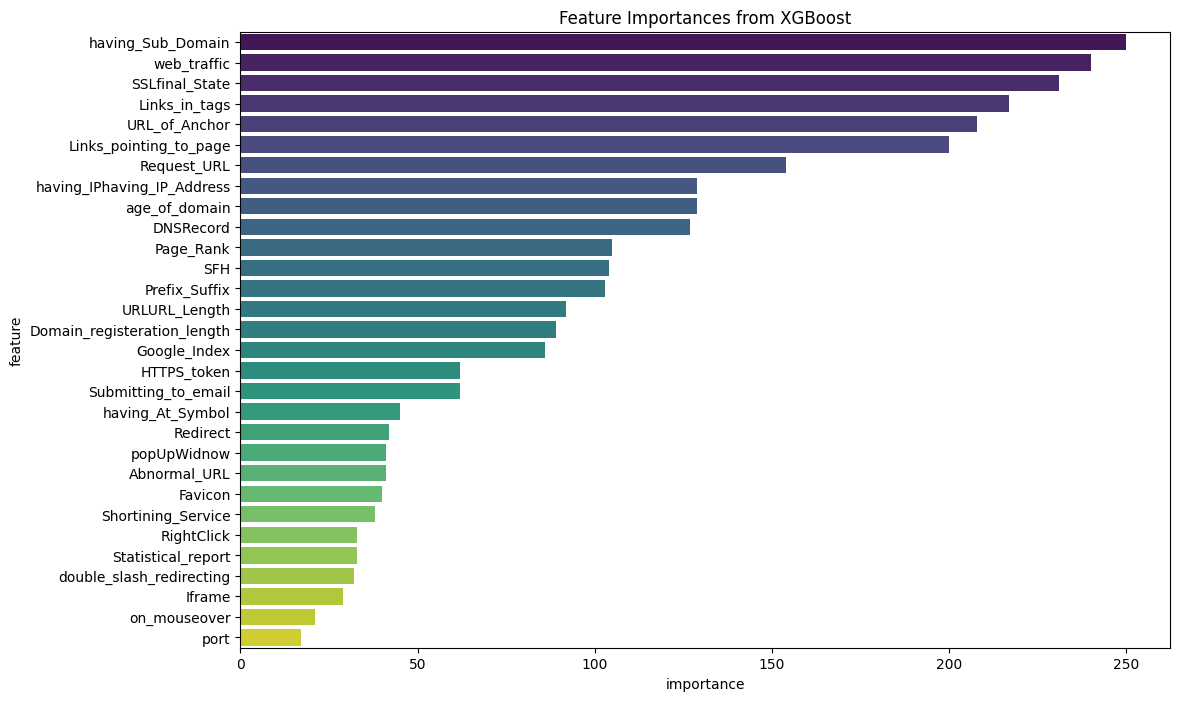

In [23]:
# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from XGBoost')
plt.show()